<a href="https://colab.research.google.com/github/Janya-Sharma-22/machine_learning/blob/main/EXP_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')

print(df.head())
print("\nDescriptive Stats:\n", df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
df.drop('customerID', axis=1, inplace=True, errors='ignore')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

print("✅ Dropped 'customerID' and cleaned 'TotalCharges'.")
print(f"Sample of TotalCharges column:\n{df['TotalCharges'].head()}")

✅ Dropped 'customerID' and cleaned 'TotalCharges'.
Sample of TotalCharges column:
0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


<ipython-input-15-4d9662456587>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [ ]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print("✅ Label encoding applied to categorical features.")
print("Encoded DataFrame sample:\n", df.head())

✅ Label encoding applied to categorical features.
Encoded DataFrame sample:
    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                

In [ ]:
scaler = StandardScaler()
X = df.drop('Churn', axis=1)
y = df['Churn']
X_scaled = scaler.fit_transform(X)

print("✅ Feature scaling complete.")
print(f"Feature shape: {X_scaled.shape}")
print(f"First 3 scaled rows:\n{X_scaled[:3]}")


✅ Feature scaling complete.
Feature shape: (7043, 19)
First 3 scaled rows:
[[-1.00955867 -0.43991649  1.03453023 -0.65401193 -1.27744458 -3.05401039
   0.06272275 -1.18323364 -0.91883775  1.24254983 -1.02791014 -0.92526212
  -1.11349541 -1.12140513 -0.8282069   0.8297975   0.39855772 -1.16032292
  -0.99497138]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.06632742  0.32743831
  -0.9915883  -1.18323364  1.40732123 -1.02991925  1.24511061 -0.92526212
  -1.11349541 -1.12140513  0.37127103 -1.20511329  1.33486261 -0.25962894
  -0.17387565]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193 -1.23672422  0.32743831
  -0.9915883  -1.18323364  1.40732123  1.24254983 -1.02791014 -0.92526212
  -1.11349541 -1.12140513 -0.8282069   0.8297975   1.33486261 -0.36266036
  -0.96039939]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Dataset split complete.")
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

✅ Dataset split complete.
Train samples: 5634, Test samples: 1409


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Random Forest model trained.")

✅ Random Forest model trained.


In [ ]:
y_pred = model.predict(X_test)

print("✅ Predictions made.")
print(f"Sample predictions: {y_pred[:10]}")

✅ Predictions made.
Sample predictions: [1 0 0 1 0 0 0 0 0 0]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("📊 Confusion Matrix:")
print(cm)

print("\n📋 Classification Report:")
print(cr)

print(f"✅ Accuracy Score: {acc:.4f}")

📊 Confusion Matrix:
[[945  91]
 [197 176]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

✅ Accuracy Score: 0.7956


In [ ]:
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print("✅ Feature importances calculated.")
print(feature_df.head(10))

✅ Feature importances calculated.
            Feature  Importance
18     TotalCharges    0.190022
17   MonthlyCharges    0.177682
4            tenure    0.157228
14         Contract    0.077324
16    PaymentMethod    0.050392
8    OnlineSecurity    0.047675
11      TechSupport    0.044250
0            gender    0.028209
9      OnlineBackup    0.027190
7   InternetService    0.026254


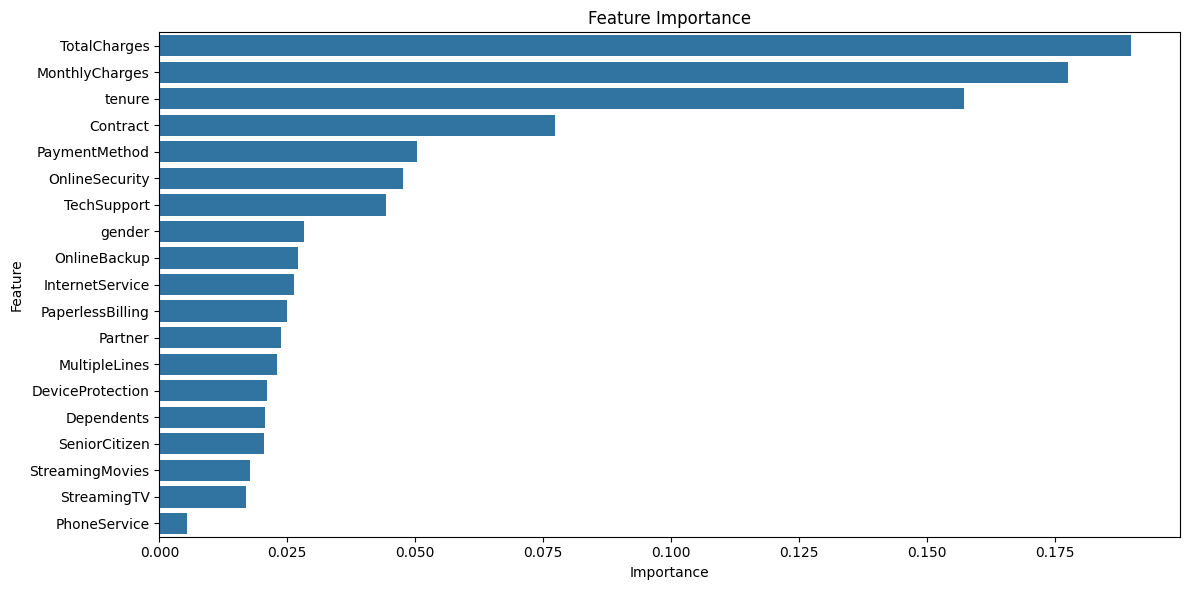

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('📈 Feature Importance')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


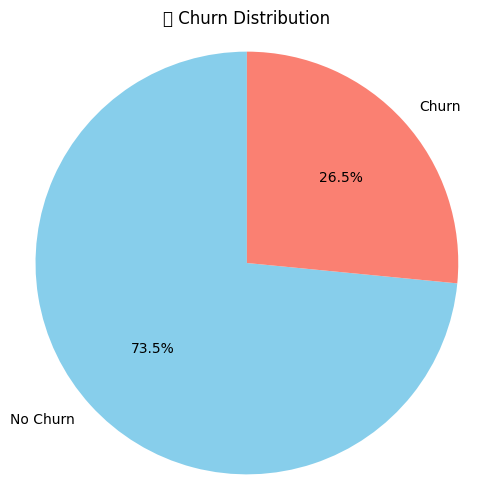

In [ ]:
churn_counts = df['Churn'].value_counts()
labels = ['No Churn', 'Churn']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('📊 Churn Distribution')
plt.axis('equal')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


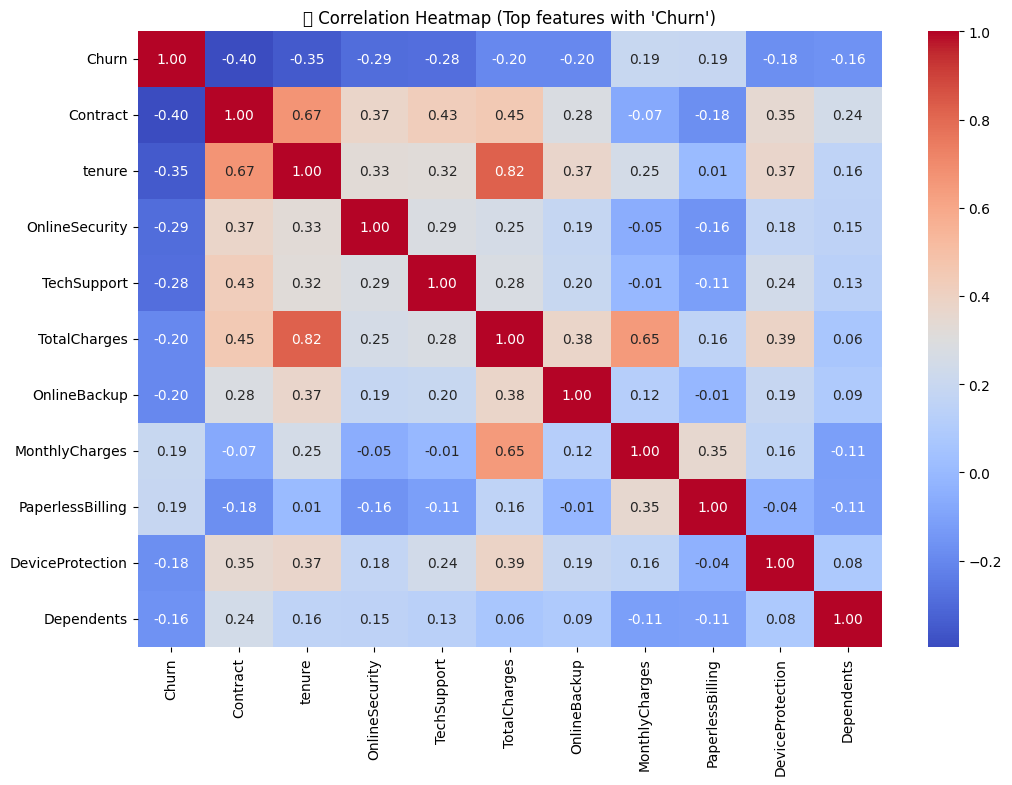

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
top_features = corr['Churn'].abs().sort_values(ascending=False).head(11).index
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔗 Correlation Heatmap (Top features with 'Churn')")
plt.show()